# Init
Inicializa as bibliotecas utilizadas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


## Exercício 1
Carregamento de Dados: Identifique as características (features) e o alvo (target) nos conjuntos de dados, compreendendo sua estrutura e importância.

In [2]:
# Carregar dados do arquivo csv
# df = pd.read_csv('heart.csv')
df = pd.read_csv('https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/heart.csv')

# Visializar dados carregados
print("Dados Originais:")
print(df)

# Features
# Foram escolhidas as features numéricas
features = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]

# Target
target = df['HeartDisease']

Dados Originais:
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172

## Exercício 2
Divisão de Dados: Separe os dados em conjuntos de treino e validação, essenciais para o desenvolvimento e avaliação de modelos de ML. Você irá dividir 80% dos dados para treino e o restante para validação.

In [3]:
TAMANHO_TESTE = 0.2 # quantidade de dados para teste
ALEATORIO = 11 # controlar aleatoriedade

# Separar em dados de treino e dados de teste
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=TAMANHO_TESTE, random_state=ALEATORIO, stratify=target)

## Exercício 3
Transformação de Dados: Utilize transformadores do Scikit-Learn para ajustar e padronizar as variáveis dos dados.

In [4]:
# Normalizar os dados
scaler = StandardScaler()
feature_train_scaled = pd.DataFrame(scaler.fit_transform(feature_train), columns=feature_train.columns)
feature_test_scaled = pd.DataFrame(scaler.transform(feature_test), columns=feature_test.columns)

## Exercício 4
Modelagem de K-Nearest Neighbors (KNN): Implemente e ajuste o algoritmo KNN, compreendendo suas nuances e aplicabilidade.

In [5]:
K = 11

# Treinar modelo
model = KNeighborsClassifier(n_neighbors=K)
model.fit(feature_train_scaled, target_train)

KNeighborsClassifier(n_neighbors=11)

## Exercício 5
Avaliação de Modelos: Avalie a qualidade do modelo desenvolvido usando acurácia

In [6]:
target_pred = model.predict(feature_test_scaled)
acuaracia = accuracy_score(target_test, target_pred)
print("Acurácia:", acuaracia)

Acurácia: 0.8097826086956522


## Exercício 6
Análise de Parâmetros: Explore diferentes valores para o parâmetro K do KNN e analise seu impacto nos resultados obtidos (através da acurácia do modelo para os dados de validação).

k	acurácia
melhor k: 19	acurácia: 0.842391304347826


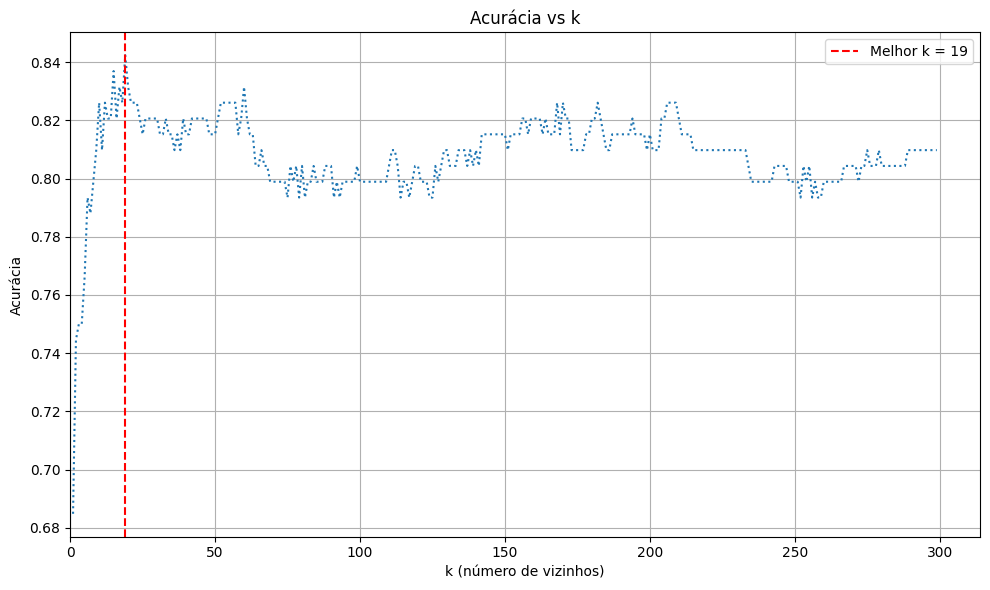

In [7]:
list_k = range(1, 300)
list_acuaracia = []
max_acuracia = 0
max_k = 0

# Verificar acurácia para vários valores de k
print("k\tacurácia")
for k in list_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(feature_train_scaled, target_train)
    target_pred = model.predict(feature_test_scaled)
    acuaracia = accuracy_score(target_test, target_pred)
    # print(f"{k}: {acuaracia}")
    list_acuaracia.append(acuaracia)
    if acuaracia > max_acuracia:
        max_acuracia = acuaracia
        max_k = k

# Mostrar melhor k para as features escolhidas
print(f"melhor k: {max_k}\tacurácia: {max_acuracia}")

# Plotar gráfico de acurácia vs k
plt.figure(figsize=(10, 6))
plt.plot(list_k, list_acuaracia, marker='None', linestyle=':')
plt.title('Acurácia vs k')
plt.xlabel('k (número de vizinhos)')
plt.ylabel('Acurácia')
plt.grid(True)
plt.axvline(x=max_k, color='red', linestyle='--', label=f'Melhor k = {max_k}')
plt.legend()
plt.xlim(left=0)
plt.tight_layout()
plt.show()